### Logistic_Regression

Problem Statement: Classify using Logistic Regression

Dataset --> cancer.csv

Class B = 0 = -ve, M = 1 = +ve

In [1]:
#Loading the Required Library
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

In [2]:
#Load the data set
cancer = pd.read_csv("C:/Users/Akaash/Downloads/cancer.csv")
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
#Checkin For NA Values
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Inference: No NA Values are Present , the Class Variable is Catergorical So Using Label Encoder

In [4]:
#Complete Cancer dataset - applying lable encoder to species column
label_encoder = preprocessing.LabelEncoder()
cancer['diagnosis'] = label_encoder.fit_transform(cancer['diagnosis']) 
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Inference: Now the Y Variable is Encoded

#### Building Logistic Regression Model

In [5]:
# Dividing our data into input and output variables 
X = cancer.iloc[:,1:]
Y = cancer.iloc[:,0]

In [6]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [7]:
#Predict for X dataset
y_pred = classifier.predict(X)
pd.DataFrame(y_pred).value_counts() # getting the count of each category 

0    366
1    203
dtype: int64

Inference: These are Total Value Count For each class

In [8]:
#Probability
y_pred_prob = classifier.predict_proba(X)
y_pred_prob

array([[1.11022302e-15, 1.00000000e+00],
       [3.55850945e-08, 9.99999964e-01],
       [2.88035781e-07, 9.99999712e-01],
       ...,
       [6.34261108e-03, 9.93657389e-01],
       [8.80244766e-11, 1.00000000e+00],
       [9.49169389e-01, 5.08306108e-02]])

Inference: These are the Probability of Y Variable (Y_hat)/(Predicted Values)

In [9]:
#Creating Dataframe of Actual and Predicted values for Y, (Y,Y_hat)
y_pred_df= pd.DataFrame({'actual': Y,'predicted_prob': classifier.predict(X)})
y_pred_df

,actual,predicted_prob
0,1,1
1,1,1
2,1,1
3,1,0
4,1,1
...,...,...
564,1,1
565,1,1
566,1,1
567,1,1


Inference: This Give the Actual & Predicted values side by side

In [10]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[347  10]
 [ 19 193]]


Inference: The Diagonal value(347,193) are the Correctly Predicted Values i.e TN, TP

In [11]:
#Calculating Accuracy 
#TP+TN / TP + FP + FN + TN
((193+347)/(193+19+10+347))*100

94.90333919156416

Inference: The Final Accuracy of the Model is 94.90

In [12]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       357
           1       0.95      0.91      0.93       212

    accuracy                           0.95       569
   macro avg       0.95      0.94      0.95       569
weighted avg       0.95      0.95      0.95       569



#### ROC Curve

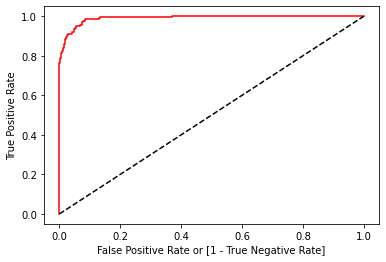

In [13]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

In [14]:
#Area Under the Curve
auc

0.9411830770043866

Inference: The Area Under the Curve For this Problem is 0.94

#### Cross Validation -- K-Folds

In [15]:
#Importing the Required Libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")  #--to ignore warnings

# Creating K-Fold Instance
num_folds = 5
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)

#Predicting & Getting the Model Score with kfold
results = cross_val_score(classifier, X, Y, cv=kfold)

In [16]:
# Accuracy for Each K-Fold
results

array([0.94736842, 0.96491228, 0.9122807 , 0.94736842, 0.92920354])

In [17]:
#Average of All k-fold Accuracy to get Final model Accuary
results.mean()*100.0

94.02266728768825